<a href="https://colab.research.google.com/github/vRodrigues22/Atividades__Fundamentos_da_Inteligencia_Computacional_e_Ciencias_de_Dados/blob/main/Atividade3_Distribuicao_amostral_TLC_p_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Atividade 3: Distribuicao Amostral, TLC e p-value

**Nome:** Valéria Oliveira Rodrigues

**Instituição:** Universidade Federal do Pará

**Curso:** Mestrado em Ciência da Computação / PPGCC

**Disciplina:** Fundamentos de Inteligência Computacional e Ciência Dados

## 🔹 Parte A - Sample Distribution e Sampling Distribution

* Simular uma população artificial da variável “emissão de CO₂ por município” com distribuição normal.

* Retirar uma amostra (sample distribution) e várias amostras para gerar a distribuição das médias amostrais (sampling distribution).

* Avaliar a probabilidade de eventos extremos, como emissões acima de 1500 toneladas/ano.

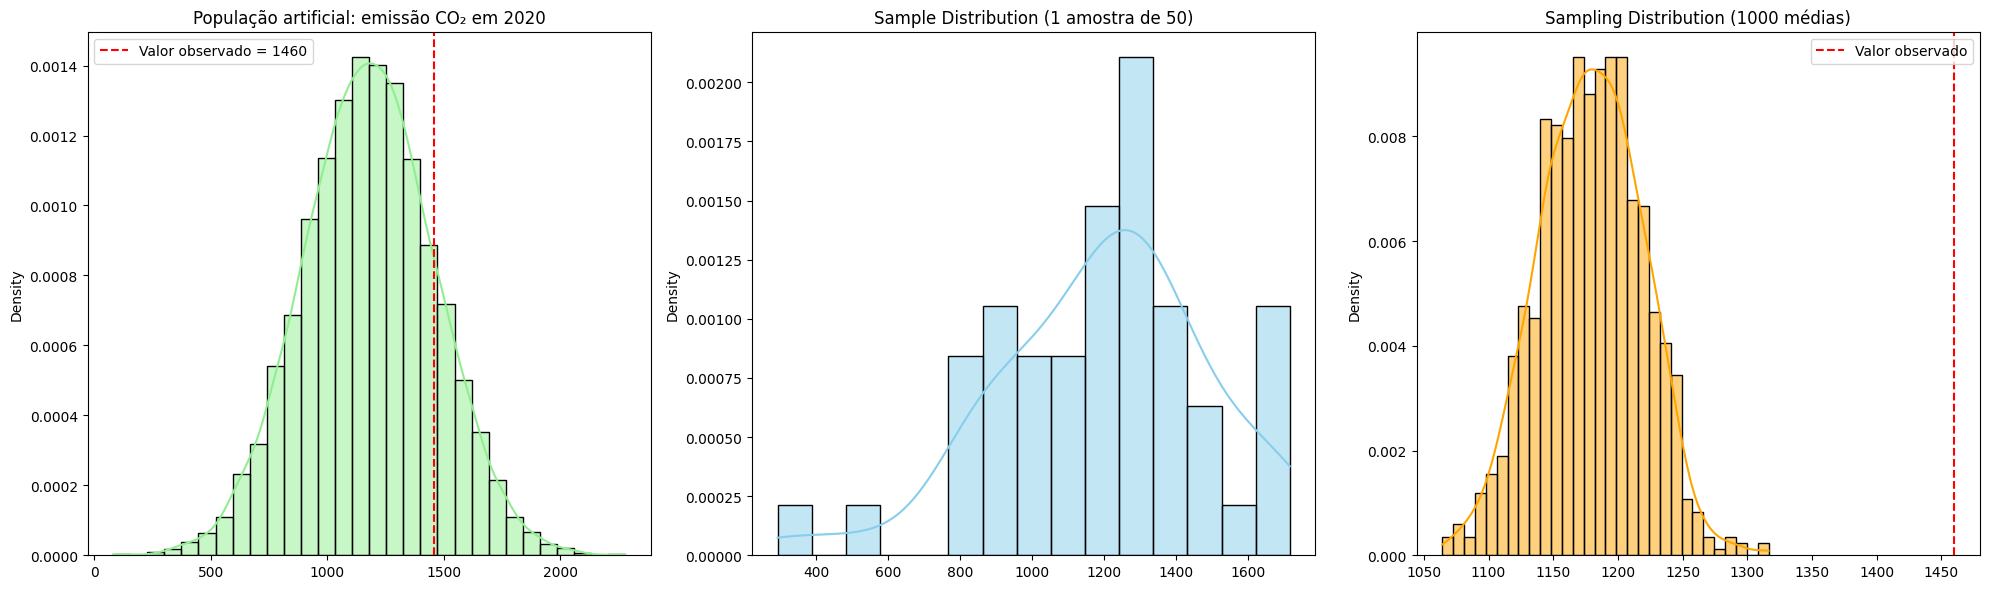

{'Média simulada (2020)': 1180,
 'Desvio padrão simulado (2020)': 280,
 'Valor observado (média + 1 desvio)': 1460,
 'Z-score': 1.0,
 'Probabilidade acumulada P(X < x_obs)': np.float64(0.8413)}

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# 1. Definição do experimento e criação da população artificial com base em dados de 2020
np.random.seed(42)
media_2020 = 1180  # Média simulada da emissão de CO₂ em 2020
desvio_2020 = 280  # Desvio padrão simulado
populacao_2020 = np.random.normal(loc=media_2020, scale=desvio_2020, size=10000)

# 2. Sample distribution - amostra única
amostra_2020 = np.random.choice(populacao_2020, size=50, replace=False)

# 3. Sampling distribution - 1000 médias amostrais
sampling_means_2020 = [
    np.mean(np.random.choice(populacao_2020, size=50, replace=False))
    for _ in range(1000)
]

# 4. Z-score do valor observado (média + 1 desvio padrão)
x_obs = media_2020 + desvio_2020
z = (x_obs - media_2020) / desvio_2020
prob = norm.cdf(z)

# 5. Gráficos para representar os três conceitos
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# População 2020
sns.histplot(populacao_2020, bins=30, kde=True, stat='density', color='lightgreen', edgecolor='black', ax=axs[0])
axs[0].axvline(x_obs, color='red', linestyle='--', label=f'Valor observado = {x_obs:.0f}')
axs[0].set_title("População artificial: emissão CO₂ em 2020")
axs[0].legend()

# Sample distribution
sns.histplot(amostra_2020, bins=15, kde=True, stat='density', color='skyblue', edgecolor='black', ax=axs[1])
axs[1].set_title("Sample Distribution (1 amostra de 50)")

# Sampling distribution
sns.histplot(sampling_means_2020, bins=30, kde=True, stat='density', color='orange', edgecolor='black', ax=axs[2])
axs[2].axvline(x_obs, color='red', linestyle='--', label='Valor observado')
axs[2].set_title("Sampling Distribution (1000 médias)")
axs[2].legend()

plt.tight_layout()
plt.show()

# Mostrar resultados
{
    "Média simulada (2020)": media_2020,
    "Desvio padrão simulado (2020)": desvio_2020,
    "Valor observado (média + 1 desvio)": x_obs,
    "Z-score": round(z, 2),
    "Probabilidade acumulada P(X < x_obs)": round(prob, 4)
}


## 🔹 Parte B - Teorema Central do Limite (TLC)
* Aplicar o TLC a uma população com distribuição Gama (assimétrica).

* Avaliar como a forma da distribuição das médias se aproxima da normal com diferentes tamanhos de amostra (n = 10, 30, 50, 100).

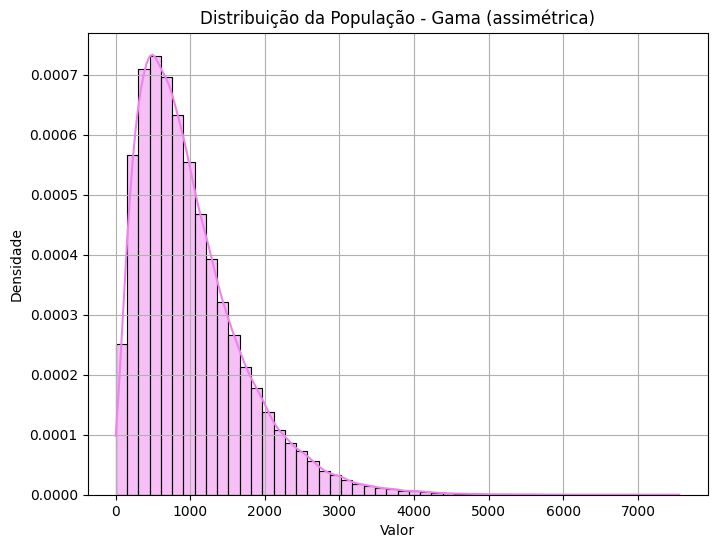

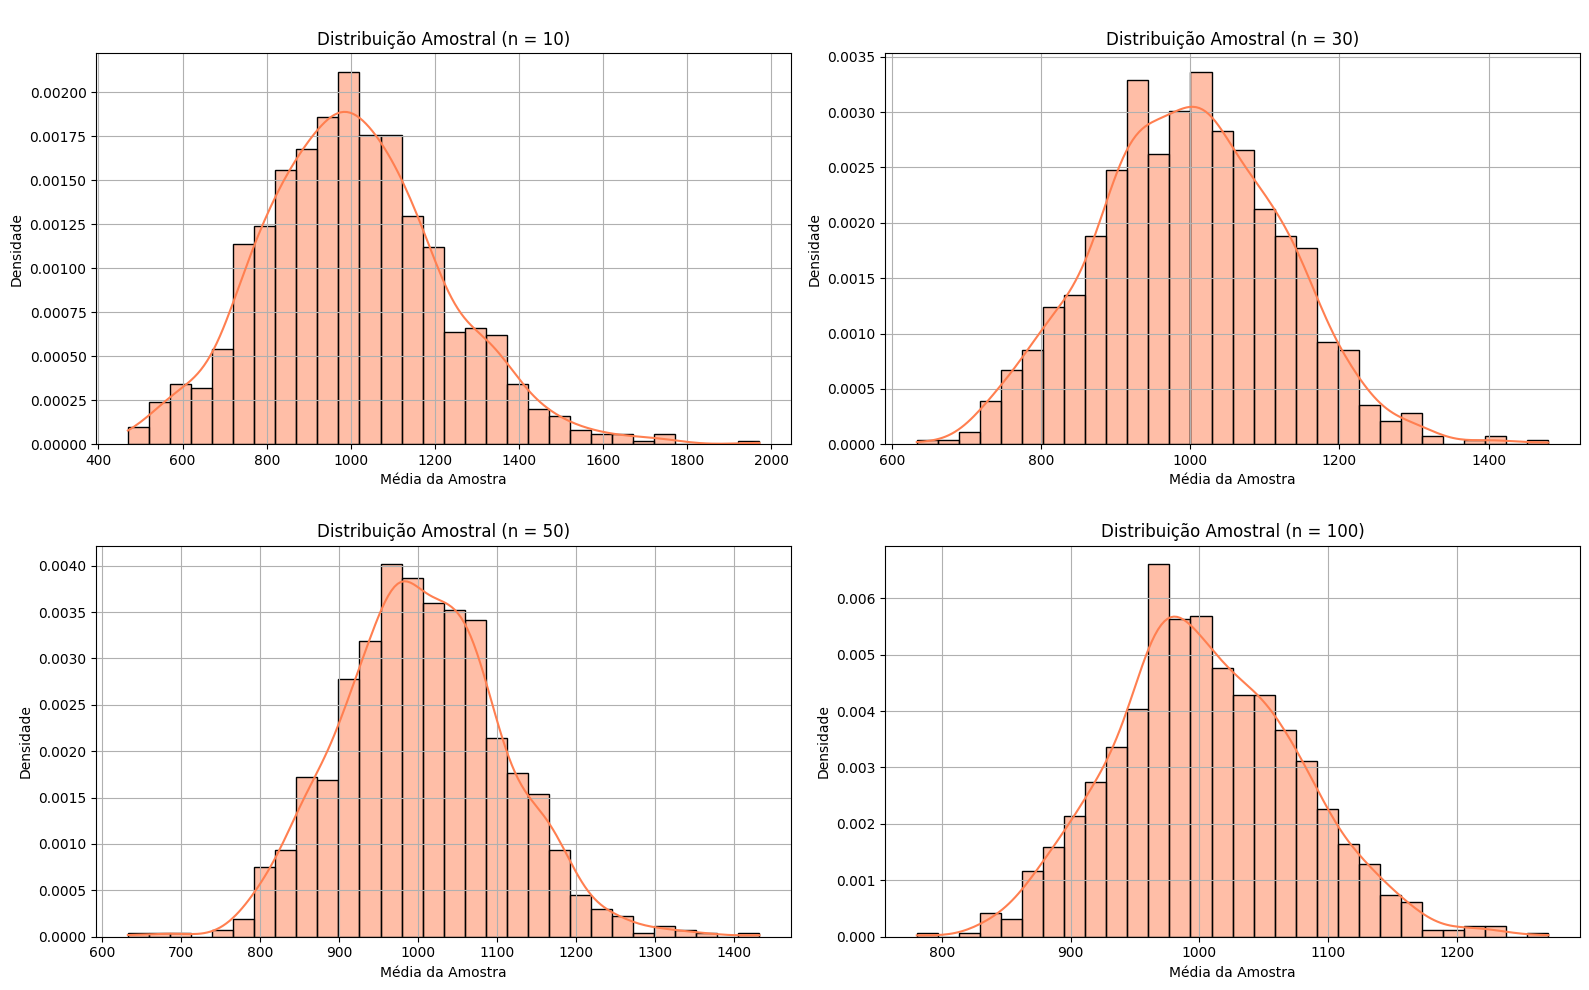

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma

# 1. Criar uma população com distribuição gama
np.random.seed(42)
populacao_gama = gamma.rvs(a=2, scale=500, size=100000)

# Visualizar a distribuição da população
plt.figure(figsize=(8,6))
sns.histplot(populacao_gama, bins=50, kde=True, color='violet', stat='density', edgecolor='black')
plt.title("Distribuição da População - Gama (assimétrica)")
plt.xlabel("Valor")
plt.ylabel("Densidade")
plt.grid(True)
plt.show()

# 2. Definir tamanhos de amostra para análise com o Teorema Central do Limite
tamanhos_amostra = [10, 30, 50, 100]
sampling_distributions = {}

# 3. Gerar distribuições amostrais para cada tamanho
for n in tamanhos_amostra:
    medias = []
    for _ in range(1000):
        amostra = np.random.choice(populacao_gama, size=n, replace=False)
        medias.append(np.mean(amostra))
    sampling_distributions[n] = medias

# 4. Plotar gráficos lado a lado para comparar
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.flatten()

for i, n in enumerate(tamanhos_amostra):
    sns.histplot(sampling_distributions[n], bins=30, kde=True, stat='density',
                 color='coral', edgecolor='black', ax=axs[i])
    axs[i].set_title(f"\nDistribuição Amostral (n = {n})")
    axs[i].set_xlabel("Média da Amostra")
    axs[i].set_ylabel("Densidade")
    axs[i].grid(True)

plt.tight_layout()
plt.show()


## 🔹 Parte C - Cálculo do p-valor
* Simular um evento onde um valor observado é comparado com uma distribuição teórica.

* Mostrar passo a passo com gráficos:

 - Localização do valor na curva

 - Cálculo do z-score

 - Cálculo do p-valor

 - Interpretação

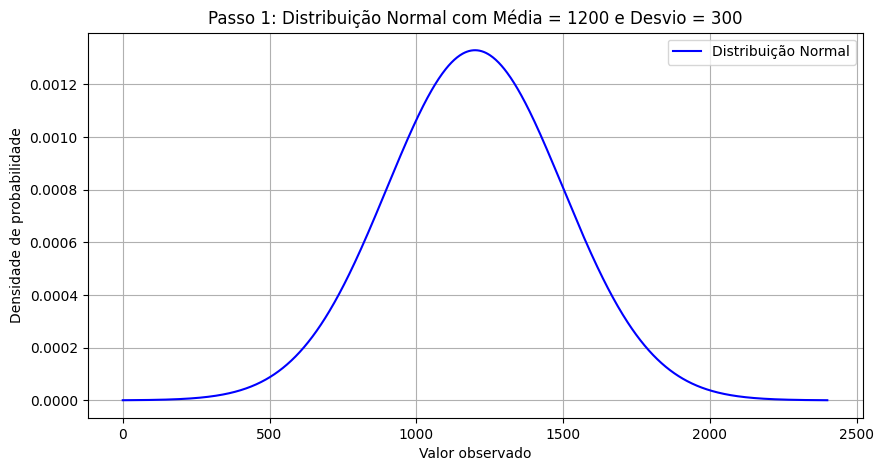

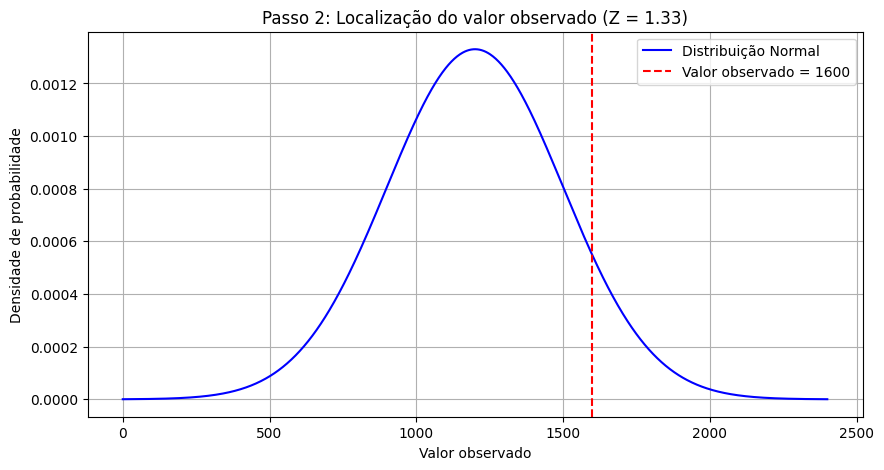

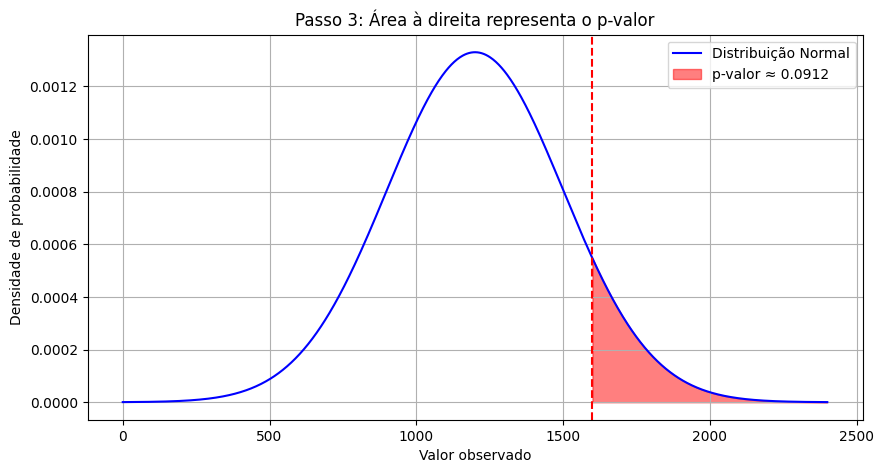

{'Média': 1200,
 'Desvio padrão': 300,
 'Valor observado': 1600,
 'Z-score': 1.33,
 'p-valor': np.float64(0.0912),
 'Interpretação': 'O p-valor representa a probabilidade de observar um valor igual ou maior que 1600, assumindo uma média de 1200 e desvio de 300.'}

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Configurações do experimento
media = 1200
desvio = 300
valor_observado = 1600

# Passo 1: Visualizar a distribuição normal
x = np.linspace(media - 4*desvio, media + 4*desvio, 1000)
y = norm.pdf(x, media, desvio)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Distribuição Normal', color='blue')
plt.title("Passo 1: Distribuição Normal com Média = 1200 e Desvio = 300")
plt.xlabel("Valor observado")
plt.ylabel("Densidade de probabilidade")
plt.grid(True)
plt.legend()
plt.show()

# Passo 2: Calcular o z-score
z = (valor_observado - media) / desvio

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Distribuição Normal', color='blue')
plt.axvline(valor_observado, color='red', linestyle='--', label=f'Valor observado = {valor_observado}')
plt.title(f"Passo 2: Localização do valor observado (Z = {z:.2f})")
plt.xlabel("Valor observado")
plt.ylabel("Densidade de probabilidade")
plt.legend()
plt.grid(True)
plt.show()

# Passo 3: Calcular o p-valor (área à direita)
p_valor = 1 - norm.cdf(valor_observado, loc=media, scale=desvio)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Distribuição Normal', color='blue')
plt.fill_between(x, 0, y, where=(x >= valor_observado), color='red', alpha=0.5, label=f"p-valor ≈ {p_valor:.4f}")
plt.axvline(valor_observado, color='red', linestyle='--')
plt.title("Passo 3: Área à direita representa o p-valor")
plt.xlabel("Valor observado")
plt.ylabel("Densidade de probabilidade")
plt.legend()
plt.grid(True)
plt.show()

# Resultado final
{
    "Média": media,
    "Desvio padrão": desvio,
    "Valor observado": valor_observado,
    "Z-score": round(z, 2),
    "p-valor": round(p_valor, 4),
    "Interpretação": "O p-valor representa a probabilidade de observar um valor igual ou maior que 1600, assumindo uma média de 1200 e desvio de 300."
}


## 🔹 Parte D - Taxa de Falsos Negativos com p-valor
* Comparar duas distribuições normais com médias diferentes (uma representando a hipótese nula e outra a alternativa).

* Simular 100 amostras da distribuição alternativa e calcular p-valores com base na hipótese nula.

**Calcular a taxa de falsos negativos, ou seja, casos em que a hipótese nula não é rejeitada mesmo sendo falsa (p > 0,05).**

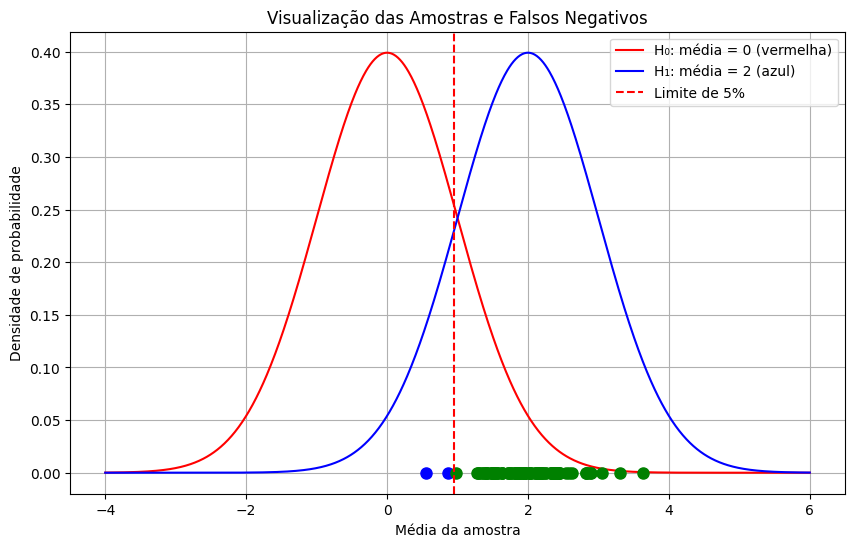

{'Número total de amostras': 100,
 'Número de falsos negativos (p > 0.05)': 2,
 'Taxa de falsos negativos (%)': np.float64(2.0)}

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Configurações iniciais
np.random.seed(42)
media_vermelha = 0.0   # Hipótese nula
media_azul = 2.0       # Hipótese alternativa verdadeira
desvio_padrao = 1.0
tamanho_amostra = 3
n_amostras = 100

# Passo 1: gerar 100 amostras de tamanho 3 da distribuição azul
amostras = np.random.normal(loc=media_azul, scale=desvio_padrao, size=(n_amostras, tamanho_amostra))
medias_amostrais = np.mean(amostras, axis=1)

# Passo 2: calcular p-valores com base na distribuição vermelha (H0)
erro_padrao = desvio_padrao / np.sqrt(tamanho_amostra)
z_scores = (medias_amostrais - media_vermelha) / erro_padrao
p_values = 1 - norm.cdf(z_scores)

# Identificar falsos negativos (p > 0.05)
falsos_negativos = p_values > 0.05
taxa_falsos_negativos = np.mean(falsos_negativos)

# Visualização
x = np.linspace(-4, 6, 1000)
y_vermelha = norm.pdf(x, loc=media_vermelha, scale=desvio_padrao)
y_azul = norm.pdf(x, loc=media_azul, scale=desvio_padrao)

plt.figure(figsize=(10, 6))
plt.plot(x, y_vermelha, color='red', label='H₀: média = 0 (vermelha)')
plt.plot(x, y_azul, color='blue', label='H₁: média = 2 (azul)')

for media, pval in zip(medias_amostrais, p_values):
    cor = 'blue' if pval > 0.05 else 'green'
    plt.plot(media, 0, 'o', color=cor, markersize=8)

plt.axvline(x=norm.ppf(0.95, loc=media_vermelha, scale=erro_padrao), color='red', linestyle='--', label='Limite de 5%')
plt.title('Visualização das Amostras e Falsos Negativos')
plt.xlabel('Média da amostra')
plt.ylabel('Densidade de probabilidade')
plt.legend()
plt.grid(True)
plt.show()

# Exibir resultado final
{
    "Número total de amostras": n_amostras,
    "Número de falsos negativos (p > 0.05)": int(np.sum(falsos_negativos)),
    "Taxa de falsos negativos (%)": round(taxa_falsos_negativos * 100, 2)
}
